In [1]:
import pandas as pd
from plot_params import *
stat_homer = pd.read_csv(outdir / 'motif_enrichment_human_all_30bp.csv', index_col = 0)

In [2]:
def make_set(df, type = 'INTRON'):
    dedup = df.sort_values(by = type, ascending = False
                                 ).drop_duplicates(subset = 'RBP', keep = 'first')
    sub = dedup[['RBP', type]]
    sub.columns = [0,1]
    return sub

In [3]:
stat_homer.head()

,experiment,category,p-value,odds ratio,sig,FDR,l2or,-log10 FDR,RBP,is_SynGO
0,ZRANB2_GGTAAGGT,<-0.1,0.275991,0.000000,False,0.387211,-inf,0.412052,ZRANB2,False
1,ZRANB2_GGTAAGGT,>0.1,0.409391,1.900976,False,0.549754,0.926741,0.259832,ZRANB2,False
2,ZFP36_TATTTATT,<-0.1,0.008436,0.488951,True,0.015549,-1.032239,1.808288,ZFP36,False
3,ZFP36_TATTTATT,>0.1,0.001925,0.000000,True,0.003731,-inf,2.428218,ZFP36,False
4,CELF3_GTGTGTGT,<-0.1,0.186844,0.739449,False,0.270206,-0.435478,0.568306,CELF3,False


In [4]:
enhancing = make_set(stat_homer.loc[stat_homer['category']=='<-0.1'], type = 'odds ratio')
supressing = make_set(stat_homer.loc[stat_homer['category']=='>0.1'], type = 'odds ratio')

In [5]:
import gseapy as gp

gene_sets = 'GO_Molecular_Function_2023'
pre_res = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=gene_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

2024-12-11 14:13:03,519 [WARNING] Duplicated values found in preranked stats: 30.23% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [6]:
import gseapy as gp

gene_sets = 'GO_Cellular_Component_2023'
pre_res_cc = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=gene_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

2024-12-11 14:13:03,585 [WARNING] Duplicated values found in preranked stats: 30.23% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [7]:
gene_sets = 'GO_Biological_Process_2023'
pre_res_bp = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=gene_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

2024-12-11 14:13:03,644 [WARNING] Duplicated values found in preranked stats: 30.23% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [8]:
domain = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets='InterPro_Domains_2019',
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

2024-12-11 14:13:03,944 [WARNING] Duplicated values found in preranked stats: 30.23% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [9]:
domain.res2d.loc[domain.res2d['FDR q-val']<0.2]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes


/tscc/nfs/home/hsher/miniconda3/envs/gseapy1.0.5/lib/python3.10/site-packages/gseapy/plot.py:1380: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(loc=(0, 1.02))


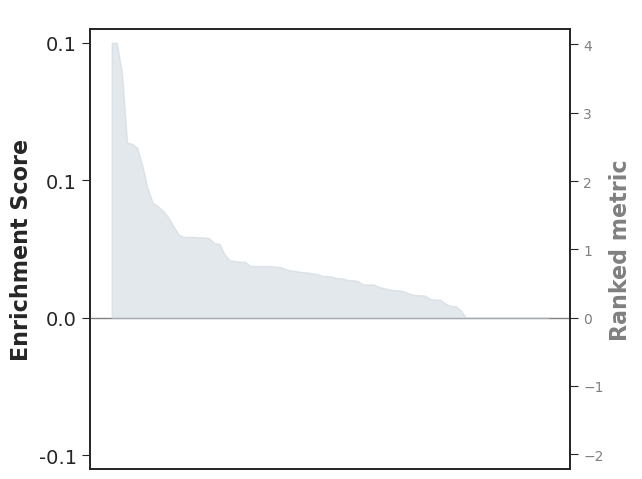

In [10]:
obj=pre_res
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms,
              figsize = (3,3)) # v1.0.5
plt.savefig(figdir / f'4_gsea_homer_mf.pdf')

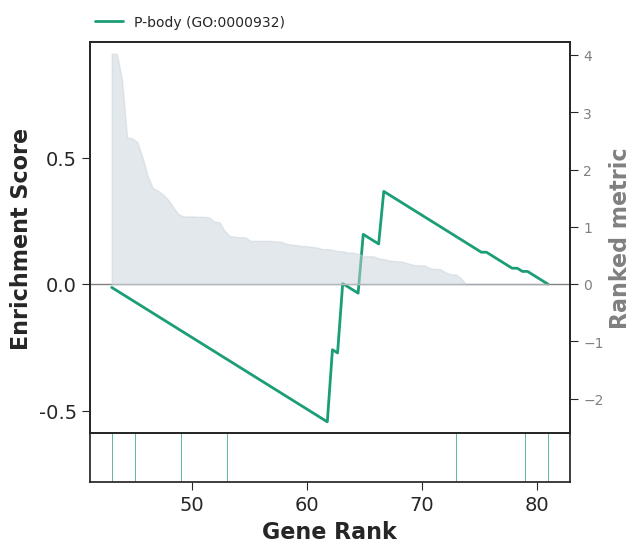

In [11]:
obj=pre_res_cc
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_homer_c.pdf')

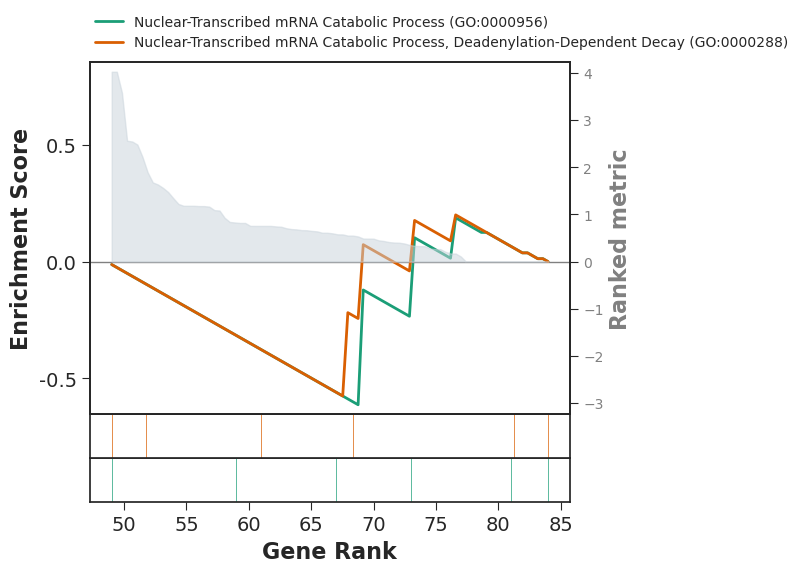

In [12]:
obj=pre_res_bp
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_homer_bp.pdf')

In [13]:
pre_res_bp.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Nuclear-Transcribed mRNA Catabolic Process (GO...,-0.6125,-1.483752,0.011494,0.109833,0.098851,6/6,44.19%,RC3H2;RC3H1;ZC3H12A;PABPN1L;CNOT4;ZFP36
1,prerank,"RNA Splicing, Via Transesterification Reaction...",0.678134,1.456886,0.014056,1.0,0.581,8/20,16.28%,RBM4B;RBM4;SRSF5;RBM6;SNRPB2;PHF5A;RBM41;SYNCRIP
2,prerank,"Nuclear-Transcribed mRNA Catabolic Process, De...",-0.575,-1.399744,0.063158,0.088912,0.149425,6/6,47.67%,RC3H2;RC3H1;PABPN1L;CNOT4;ZFP36;EXOSC2
3,prerank,mRNA Processing (GO:0006397),0.639823,1.390954,0.023116,1.0,0.796,12/23,30.23%,RBM4B;RBM4;SRSF5;RBM6;SNRPB2;PHF5A;RBM41;SYNCR...
4,prerank,"mRNA Splicing, Via Spliceosome (GO:0000398)",0.624847,1.357525,0.036217,1.0,0.867,8/23,16.28%,RBM4B;RBM4;SRSF5;RBM6;SNRPB2;PHF5A;RBM41;SYNCRIP
5,prerank,Spliceosomal Complex Assembly (GO:0000245),0.675325,1.328979,0.102941,1.0,0.907,9/9,39.53%,SRSF5;SNRPB2;PHF5A;CELF1;SRSF10;SF3B6;CELF4;PU...
6,prerank,Post-Transcriptional Regulation Of Gene Expres...,0.680818,1.27975,0.128617,1.0,0.965,2/7,8.14%,RBM4B;MEX3D
7,prerank,Regulation Of Translation (GO:0006417),0.608869,1.236819,0.171604,1.0,0.987,2/11,2.33%,RBM4B;RBM4
8,prerank,Negative Regulation Of Cellular Biosynthetic P...,0.686911,1.234179,0.207955,1.0,0.988,2/5,16.28%,RBM4;SYNCRIP
9,prerank,Regulation Of RNA Splicing (GO:0043484),0.600976,1.210323,0.19171,1.0,0.993,5/11,24.42%,LARP7;PTBP3;HNRNPH2;CELF1;SRSF10


/tscc/nfs/home/hsher/miniconda3/envs/gseapy1.0.5/lib/python3.10/site-packages/gseapy/plot.py:1380: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(loc=(0, 1.02))


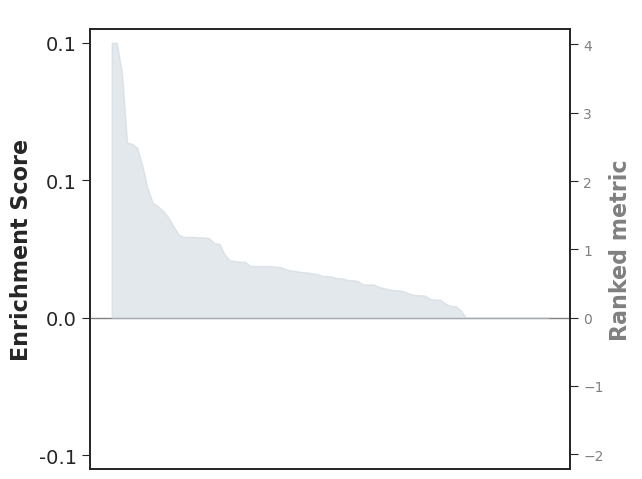

In [14]:
obj=domain
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_homer_domain.pdf')

In [15]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [16]:
# make Karen's MS and syngo into custom gene sets!
# https://github.com/zqfang/GSEApy/issues/60

In [17]:
ipsc_b = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S4',
                  skiprows = 2)
ipsc_a = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S3',
                  skiprows = 2)

human_b = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S6',
                  skiprows = 2)
human_a = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S5',
                  skiprows = 2)
syngo = pd.read_excel('synGo/syngo_genes.xlsx')

In [18]:
synapse_proteomic_sets = {
    'human proteomics':list(set(human_a['Gene Symbol']).intersection(set(human_b['Gene Symbol']))),
    'iPSC proteomics': list(set(ipsc_a['Gene Symbol']).intersection(set(ipsc_b['Gene Symbol']))),
    'synGO': syngo['hgnc_symbol'].tolist()
}

In [19]:
pre_res_syn = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=synapse_proteomic_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

2024-12-11 14:13:11,488 [WARNING] Duplicated values found in preranked stats: 30.23% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


/tscc/nfs/home/hsher/miniconda3/envs/gseapy1.0.5/lib/python3.10/site-packages/gseapy/plot.py:1380: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(loc=(0, 1.02))


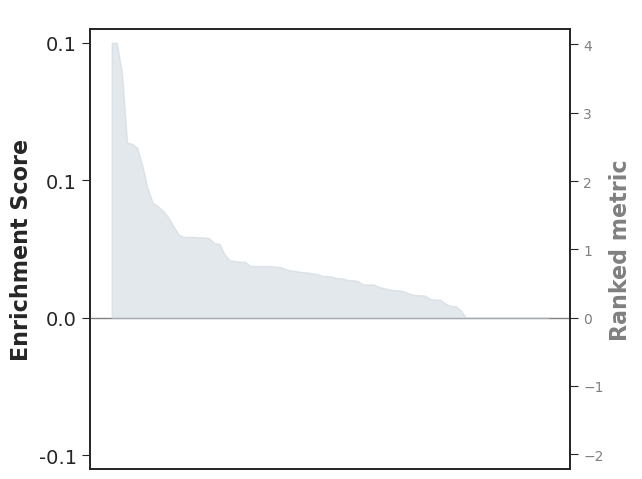

In [20]:
obj=pre_res_syn
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_homer_syn.pdf')

In [21]:
obj.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,human proteomics,0.475565,1.044082,0.416,1.0,0.672,20/29,52.33%,PTBP3;PCBP1;SYNCRIP;HNRNPH2;RBM25;TROVE2;CELF1...
1,prerank,iPSC proteomics,0.344934,0.749209,0.886774,1.0,0.977,13/23,51.16%,PCBP1;SYNCRIP;HNRNPH2;TROVE2;SRSF10;ELAVL3;ELA...
2,prerank,synGO,0.359712,0.745923,0.851365,0.884834,0.977,11/14,63.95%,PCBP1;SYNCRIP;HNRNPH2;ELAVL1;ELAVL4;HNRNPK;HNR...
